In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from PIL import Image

In [4]:
# Labels:
# 1 - angry
# 2 - disgust
# 3 - fear
# 4 - happy
# 5 - neutral
# 6 - sad
# 7 - surprise
def load_images_from_folder(folder, label, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img = img.resize(image_size)
        img_array = np.array(img).flatten() # Flatten the image
        images.append(img_array)

        if label == 'jaffe':
            code = filename.split('.')[1][:2]

            actions = {
                'AN': 1,
                'DI': 2,
                'FE': 3,
                'HA': 4,
                'NE': 5,
                'SA': 6,
                'SU': 7
            }
            labels.append(actions.get(code))
        else:
            labels.append(label)

    return images, labels

labels_jaffe = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
labels_ckplus = ["Angry", "Disgust", "Fear", "Happy", "Contempt", "Sad", "Surprise"]

## Jaffe Dataset

In [5]:
face_images, face_labels = load_images_from_folder('../Data/jaffe/jaffe', 'jaffe')

x = np.array(face_images)
y = np.array(face_labels)

## CK+ Dataset

In [6]:
anger_images, anger_labels = load_images_from_folder('../Data/ck+Dataset/anger', 1)
disgust_images, disgust_labels = load_images_from_folder('../Data/ck+Dataset/disgust', 2)
fear_images, fear_labels = load_images_from_folder('../Data/ck+Dataset/fear', 3)
happy_images, happy_labels = load_images_from_folder('../Data/ck+Dataset/happy', 4)
contempt_images, contempt_labels = load_images_from_folder('../Data/ck+Dataset/contempt', 5)
sad_images, sad_labels = load_images_from_folder('../Data/ck+Dataset/sadness', 6)
surprise_images, surprise_labels = load_images_from_folder('../Data/ck+Dataset/surprise', 7)

x = np.array(anger_images + disgust_images + fear_images + happy_images + contempt_images + sad_images + surprise_images)
y = np.array(anger_labels + disgust_labels + fear_labels + happy_labels + contempt_labels + sad_labels + surprise_labels)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
k = 5 # Set number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Test Accuracy: 34.88%


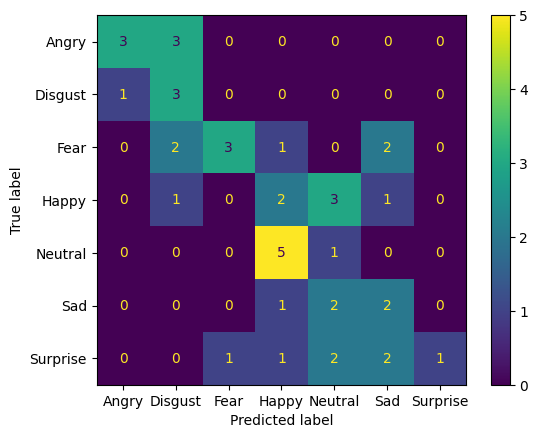

Confusion Matrix:
[[3 3 0 0 0 0 0]
 [1 3 0 0 0 0 0]
 [0 2 3 1 0 2 0]
 [0 1 0 2 3 1 0]
 [0 0 0 5 1 0 0]
 [0 0 0 1 2 2 0]
 [0 0 1 1 2 2 1]]
Classification Report:
              precision    recall  f1-score   support

       Angry       0.75      0.50      0.60         6
     Disgust       0.33      0.75      0.46         4
        Fear       0.75      0.38      0.50         8
       Happy       0.20      0.29      0.24         7
     Neutral       0.12      0.17      0.14         6
         Sad       0.29      0.40      0.33         5
    Surprise       1.00      0.14      0.25         7

    accuracy                           0.35        43
   macro avg       0.49      0.37      0.36        43
weighted avg       0.52      0.35      0.36        43



In [47]:
from sklearn.metrics import  confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test data
y_pred = knn.predict(x_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels_jaffe)
disp.plot()

plt.show()
print('Confusion Matrix:')
print(conf_matrix)

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=labels_jaffe)
print("Classification Report:")
print(class_report)

In [48]:
def preprocess_image(image_path, image_size=(64, 64)):
    img = Image.open(image_path)
    img = img.resize(image_size)
    img_array = np.array(img).flatten() # Flatten into 1D array
    return img_array.reshape(1, -1) # Reshape to 2D array for prediction

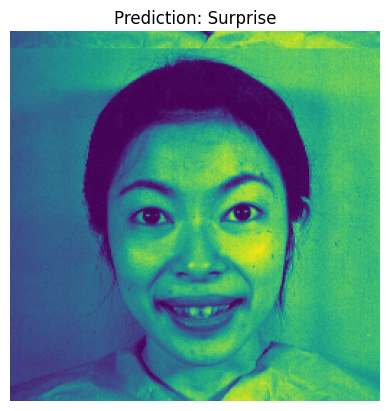

In [51]:
import matplotlib.pyplot as plt

def display_image_with_label(image_path, label):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis("off")
    actions = {
        1: 'Angry',
        2: 'Disgust',
        3: 'Fear',
        4: 'Happy',
        5: 'Neutral/Contempt',
        6: 'Sad',
        7: 'Surprise'
    }
    plt.title(f"Prediction: {actions.get(label, 'unknown code')}")
    plt.show()

new_image_path = './jaffe/jaffe/NA.SU1.208.tiff'
#new_image_path = './ck+Dataset/contempt/S138_008_00000009.png'
new_image = preprocess_image(new_image_path)
prediction = knn.predict(new_image)[0]
display_image_with_label(new_image_path, prediction)